In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/Retail_Store_Consumer_NoTech.csv', encoding='latin-1')

In [4]:
df['Category Name'].unique()

array(['Sporting Goods', 'Hockey', 'Tennis & Racquet', 'Cardio Equipment',
       "Men's Footwear", 'Cleats', "Women's Apparel", 'Trade-In',
       'Camping & Hiking', 'Consumer Electronics', 'Cameras ',
       'Computers', 'Basketball', 'Baseball & Softball',
       "Children's Clothing", "Kids' Golf Clubs", 'Fishing', 'Books ',
       'DVDs', 'Shop By Sport', 'Accessories', 'Hunting & Shooting',
       'Pet Supplies', 'Health and Beauty', 'Boxing & MMA', 'Electronics',
       'Baby ', 'Crafts', "Women's Clothing", "Men's Clothing", 'Garden',
       'Video Games', 'Lacrosse', 'Fitness Accessories', "Girls' Apparel",
       'Golf Balls', 'As Seen on  TV!', 'CDs ', 'Soccer',
       'Strength Training', 'Music', 'Golf Gloves', 'Golf Bags & Carts',
       'Golf Shoes', 'Golf Apparel', "Women's Golf Clubs",
       "Men's Golf Clubs", 'Toys', 'Water Sports', 'Indoor/Outdoor Games'],
      dtype=object)

In [5]:
df['Market'].unique()

array(['Pacific Asia', 'LATAM', 'Africa', 'USCA', 'Europe'], dtype=object)

In [6]:
df['Order Region'].unique()

array(['Southeast Asia', 'Oceania', 'Eastern Asia', 'South America',
       'Central America', 'North Africa', 'West Africa', 'US Center ',
       'South Asia', 'Northern Europe', 'Western Europe',
       'Southern Europe', 'Caribbean', 'Southern Africa', 'West Asia',
       'East of USA', 'West of USA ', 'Central Africa', 'East Africa',
       'Eastern Europe', 'South of  USA ', 'Canada', 'Central Asia'],
      dtype=object)

Bottom performing Regions

In [3]:
# Calculate Profit by Market
region_profit = df.groupby('Order Region')['Benefit per order'].sum().reset_index()
region_profit.head()


,Order Region,Benefit per order
0,Canada,1417.849971
1,Caribbean,8847.130068
2,Central Africa,586.159967
3,Central America,33045.970131
4,Central Asia,1256.050028


In [8]:
bottom_regions = region_profit.sort_values(by="Benefit per order").head(5)

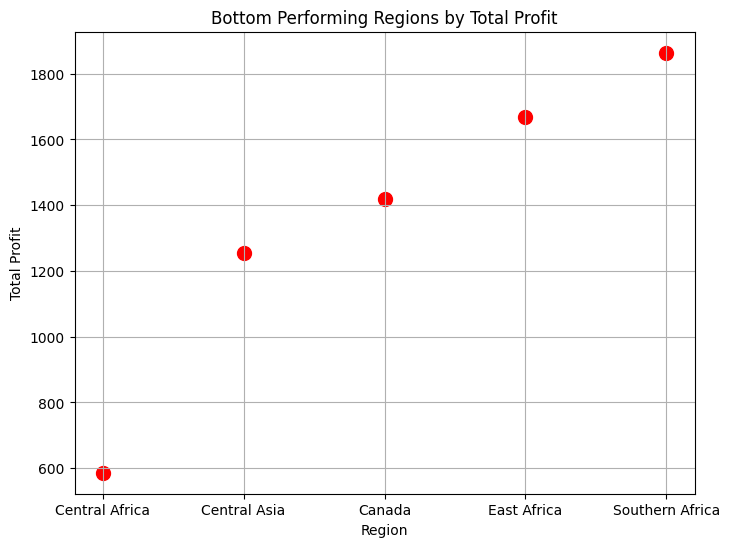

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(bottom_regions['Order Region'], bottom_regions['Benefit per order'], color='red', s=100)  # s is the size of the points
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Bottom Performing Regions by Total Profit')
plt.grid(True)  # Add gridlines for better readability
plt.show()


C:\Users\ameli\AppData\Local\Temp\ipykernel_4840\4071486054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Order Region', y = 'Benefit per order', data = bottom_regions, palette = 'Reds')


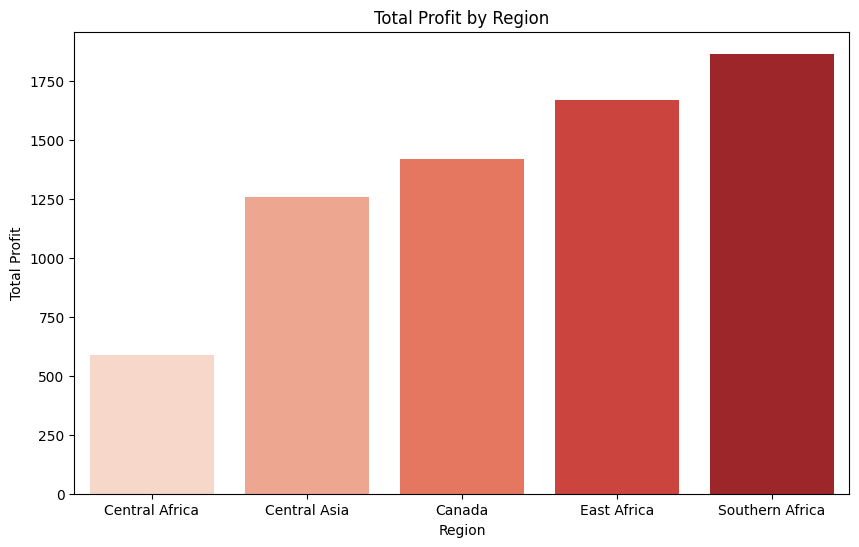

In [27]:
# region_profit = df.groupby(['Order Region'], as_index = False)['Benefit per order'].sum().sort_values(by = 'Benefit per order', ascending = False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Order Region', y = 'Benefit per order', data = bottom_regions, palette = 'Reds')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.show()

In [ ]:
%pip install joypy

In [29]:
import joypy

In [50]:
df['real_minus_sch_days'] = df['Days for shipping (real)']-df['Days for shipment (scheduled)']
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month,real_minus_sch_days,shipment_date
0,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12,1,2017-12-06 14:37:00
1,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12,-1,2017-12-07 13:34:00
2,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,RangÃºn,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12,0,2017-12-06 09:43:00
3,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,RangÃºn,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12,1,2017-12-06 08:39:00
4,CASH,2,4,158.990005,324.470001,Advance shipping,0,73,Sporting Goods,Caguas,...,Capital Nacional,CLOSED,Smart watch,12/6/2017 0:57,Standard Class,2017-12-04 00:57:00,2017,12,-2,2017-12-06 00:57:00


In [3]:
df['shipment_date'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month,shipment_date
0,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,Southeast Asia,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12,2017-12-06 14:37:00
1,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,Southeast Asia,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12,2017-12-07 13:34:00
2,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,Southeast Asia,RangÃºn,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12,2017-12-06 09:43:00
3,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,Southeast Asia,RangÃºn,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12,2017-12-06 08:39:00
4,CASH,2,4,158.990005,324.470001,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Capital Nacional,CLOSED,Smart watch,12/6/2017 0:57,Standard Class,2017-12-04 00:57:00,2017,12,2017-12-06 00:57:00


In [4]:
# Convert total seconds to days to get fractional days
df['days_bwt_ship_and_ord'] = (df['shipment_date'] - df['order_date']).dt.total_seconds() / (24 * 60 * 60)
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month,shipment_date,days_bwt_ship_and_ord
0,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12,2017-12-06 14:37:00,2.0
1,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12,2017-12-07 13:34:00,3.0
2,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,RangÃºn,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12,2017-12-06 09:43:00,2.0
3,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,RangÃºn,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12,2017-12-06 08:39:00,2.0
4,CASH,2,4,158.990005,324.470001,Advance shipping,0,73,Sporting Goods,Caguas,...,Capital Nacional,CLOSED,Smart watch,12/6/2017 0:57,Standard Class,2017-12-04 00:57:00,2017,12,2017-12-06 00:57:00,2.0


Categorical Plot for Late delivery risk against Shipping Modes

C:\Users\ameli\AppData\Local\Temp\ipykernel_3580\1633986313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


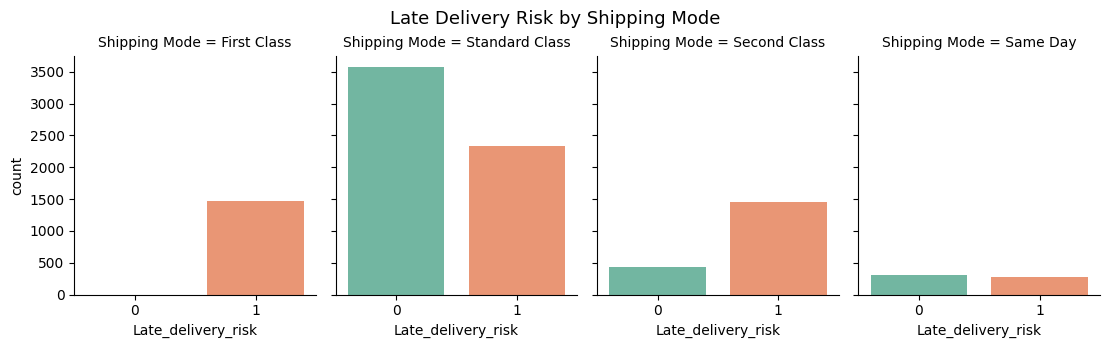

In [29]:
g = sns.catplot(
    x="Late_delivery_risk", col="Shipping Mode",
    data=df, kind="count", height=3.5, aspect=.8, 
    palette='Set2'
)

g.fig.suptitle('Late Delivery Risk by Shipping Mode', fontsize=13)
g.fig.subplots_adjust(top=0.85)
plt.show()


Trendline by Region

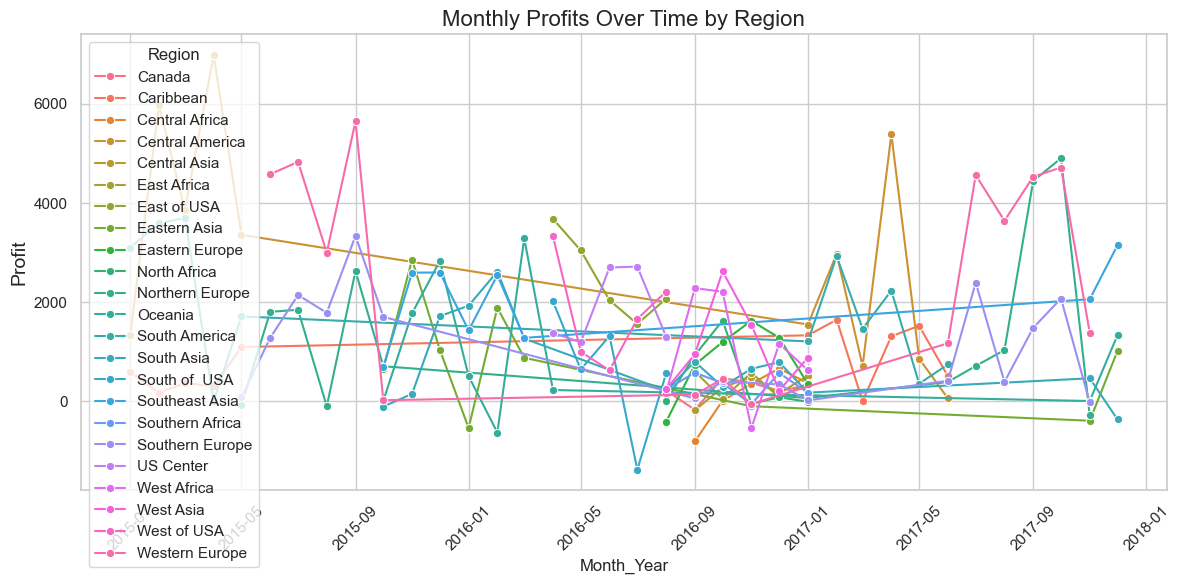

In [ ]:
df_monthly = df.groupby(['Order Region', 'year', 'month'], as_index=False)['Benefit per order'].sum()

# Step 4: Create a new column for 'Date' as the first day of each month
df_monthly['Month_Year'] = pd.to_datetime(df_monthly[['year', 'month']].assign(DAY=1))

# Step 5: Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='Month_Year', y='Benefit per order', hue='Order Region', marker='o')

# Customize the plot
plt.title('Monthly Profits Over Time by Region', fontsize=16)
# plt.xlabel('Date (Month-Year)', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Region')

# Show the plot
plt.tight_layout()
plt.show()




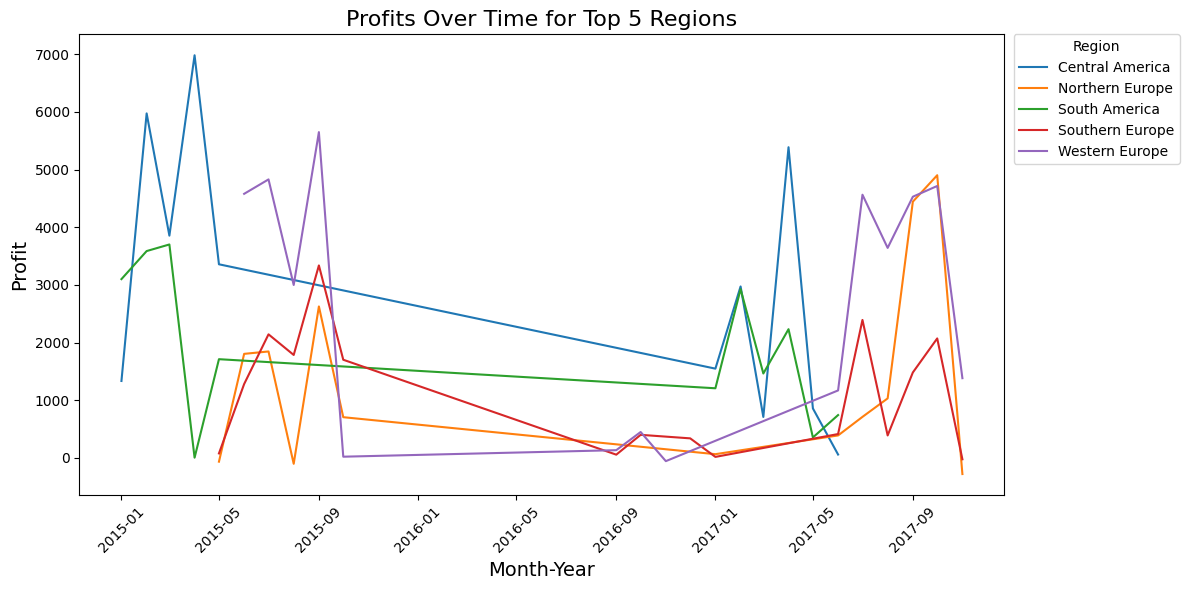

In [36]:
# Step 3: Calculate total profit by region
total_profit_by_region = df.groupby('Order Region')['Benefit per order'].sum()

# Step 4: Get the top 5 regions based on total profit
top_5_regions = total_profit_by_region.nlargest(5).index

# Step 5: Filter the DataFrame for only the top 5 regions
df_top_5_regions = df[df['Order Region'].isin(top_5_regions)]

# Step 6: Group by Region, Year, and Month, and calculate the total profit for each group
df_monthly = df_top_5_regions.groupby(['Order Region', 'year', 'month'], as_index=False)['Benefit per order'].sum()

# Step 7: Create a new column for 'Month_Year' (first day of each month)
df_monthly['Month_Year'] = pd.to_datetime(df_monthly[['year', 'month']].assign(DAY=1))

# Step 8: Plot the results for the top 5 regions
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='Month_Year', y='Benefit per order', hue='Order Region')

# Step 9: Customize the plot
plt.title('Profits Over Time for Top 5 Regions', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Region', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()


What category of products are being shipped out late

Rs between order item quantity and being shipped out late / late delivery risk

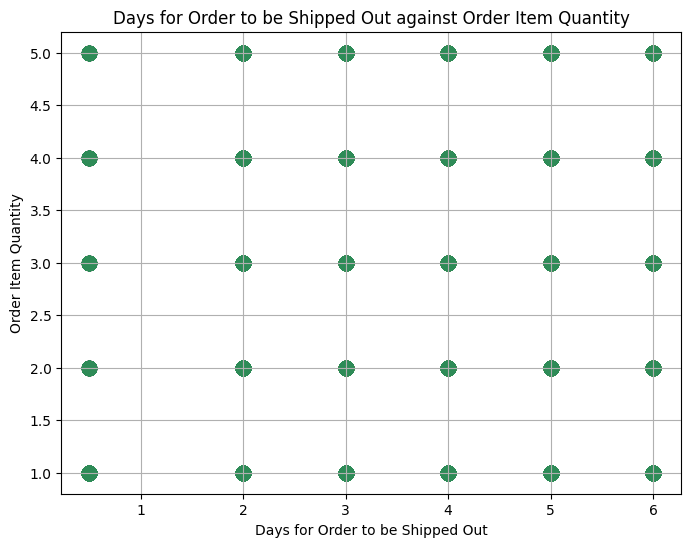

In [12]:

plt.figure(figsize=(8, 6))
plt.scatter(df['days_bwt_ship_and_ord'], df['Order Item Quantity'], color='seagreen', s=100)  # s is the size of the points
plt.xlabel('Days for Order to be Shipped Out')
plt.ylabel('Order Item Quantity')
plt.title('Days for Order to be Shipped Out against Order Item Quantity')
plt.grid(True)  # Add gridlines for better readability
plt.show()

Since there is no relationship between order quantity and late shipment, how about department?

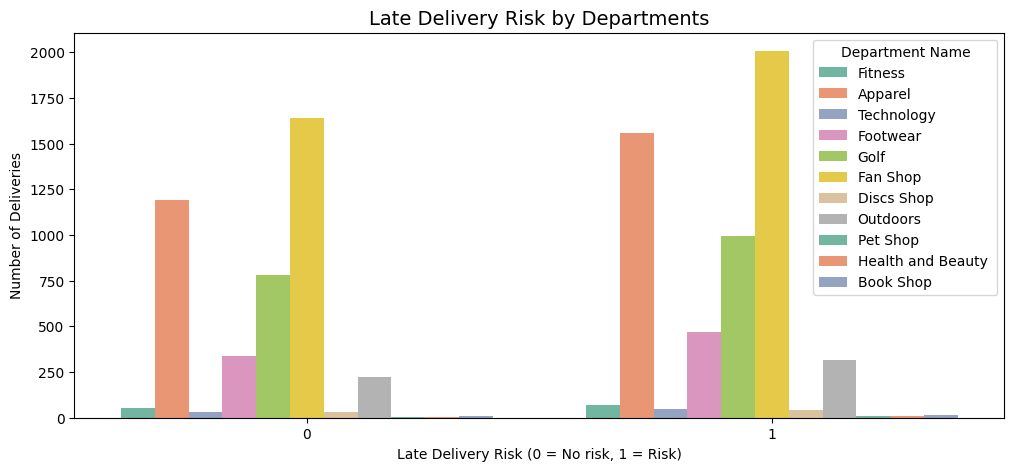

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Late_delivery_risk', hue='Department Name', data=df, palette='Set2')

plt.title('Late Delivery Risk by Departments', fontsize=14)
plt.xlabel('Late Delivery Risk (0 = No risk, 1 = Risk)')
plt.ylabel('Number of Deliveries')
plt.show()

Conclusion: No relationship between late delivery and order quantity, or by department. Overall, days for shipping items out is delayed over all these variables.

C:\Users\ameli\AppData\Local\Temp\ipykernel_3580\1744523280.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_regions.index, y=combined_regions.values, palette=colors)


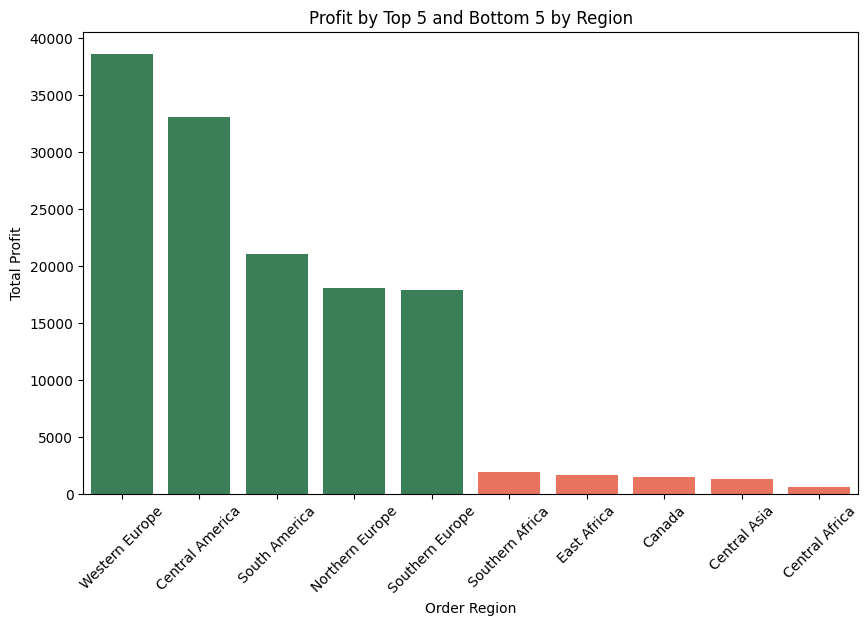

In [55]:
# Calculate total profit by region
region_profit = df.groupby('Order Region')['Benefit per order'].sum().sort_values(ascending=False)

bottom_5_regions = region_profit.tail(5)
top_5_regions = region_profit.head(5)

combined_regions = pd.concat([top_5_regions,bottom_5_regions])

plt.figure(figsize = (10,6))
colors = ["seagreen"]*len(top_5_regions)+["tomato"]*len(bottom_5_regions)
sns.barplot(x=combined_regions.index, y=combined_regions.values, palette=colors)
# Visualize profit by region
# color = sns.color_palette("Blues")
# combined_regions.plot(kind='bar', figsize=(10, 6), title='Profit by Region', color=("seagreen","tomato"), hue = combined_regions)
plt.title('Profit by Top 5 and Bottom 5 by Region')
plt.xlabel("Order Region")
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


Discount

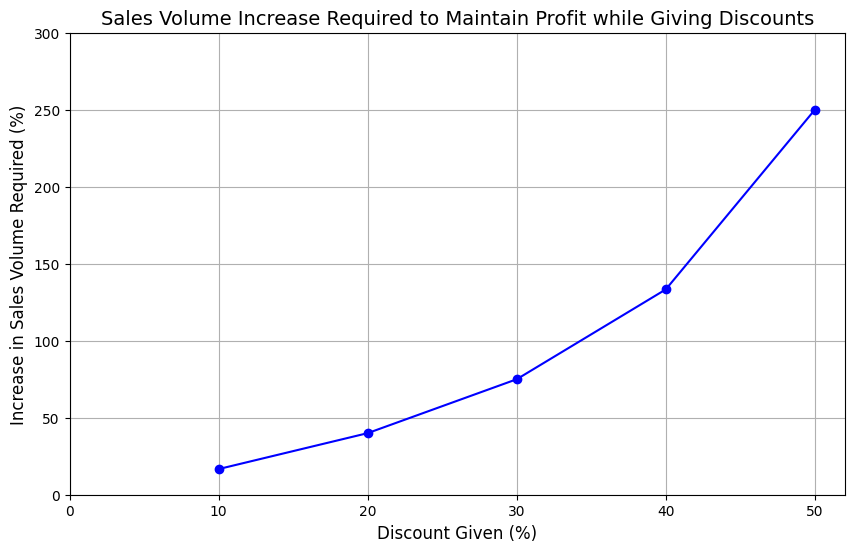

In [6]:
# Define discount levels (e.g., 10%, 20%, ... 50%)
discounts = np.arange(0.1, 0.6, 0.1)  # 10%, 20%, ..., 50%

# Original margin assumption
original_margin = 0.7  # 70% margin

# Calculate required increase in volume
required_volume_increase = (original_margin / (original_margin - discounts)) - 1

# Convert to percentage
required_volume_increase_percentage = required_volume_increase * 100

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(discounts * 100, required_volume_increase_percentage, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Sales Volume Increase Required to Maintain Profit while Giving Discounts', fontsize=14)
plt.xlabel('Discount Given (%)', fontsize=12)
plt.ylabel('Increase in Sales Volume Required (%)', fontsize=12)
plt.grid(True)

# Customize ticks
plt.xticks(np.arange(0, 51, 10))  # 0%, 10%, ..., 50%
plt.yticks(np.arange(0, 301, 50))  # 0%, 50%, ..., 300%

# Display the plot
plt.show()


In [ ]:
x = df['Order Item Discount Rate']*100
original_profit_margin = (df['Benefit per order']/df['Sales'])*100
avg_profit_margin = original_profit_margin.mean()
print(f"the average profit margin is:",avg_profit_margin)

discounted_profit_margin = df['avg_profit_margin']*(1-df['Order Item Discount Rate'])
vol_inc = (df['original_profit_margin']/df['discounted_profit_margin'])-1
vol_inc_per = vol_inc*100

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(x, vol_inc_per, marker='o', linestyle='-', color='blue', alpha=0.5)

# Add labels and title
plt.title('Increase in Volume Sales Required to Preserve Margin Levels', fontsize=14)
plt.xlabel('Discount Given (%)', fontsize=12)
plt.ylabel('Increase in Sales Volume Required (%)', fontsize=12)
plt.grid(True)

# Customize ticks
plt.xticks(np.arange(0, 31, 10)) 
plt.yticks(np.arange(0, 51, 10))  

# Display the plot
plt.show()

the average profit margin is: 11.631645428796455


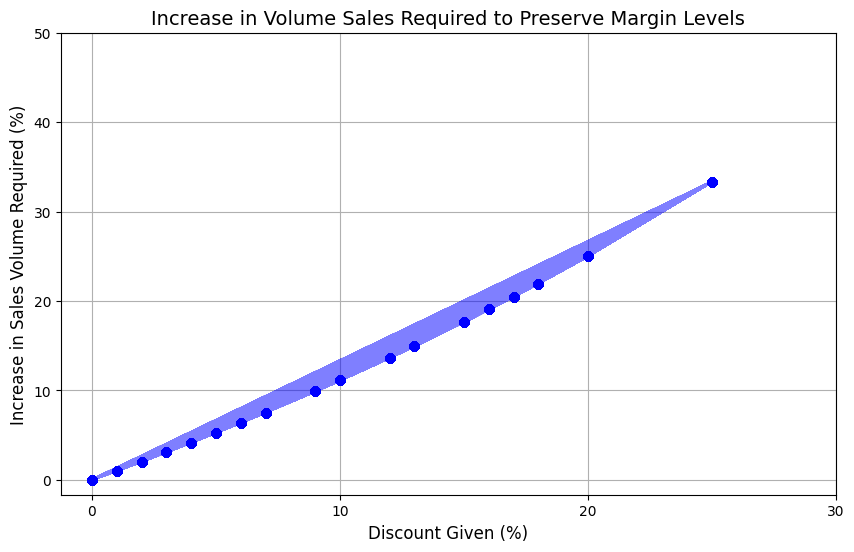

In [43]:
x = df['Order Item Discount Rate']*100
original_profit_margin = (df['Benefit per order']/df['Sales'])*100
avg_profit_margin = original_profit_margin.mean()
print(f"the average profit margin is:",avg_profit_margin)

discounted_profit_margin = df['original_profit_margin']*(1-df['Order Item Discount Rate'])
vol_inc = (df['original_profit_margin']/df['discounted_profit_margin'])-1
vol_inc_per = vol_inc*100

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(x, vol_inc_per, marker='o', linestyle='-', color='blue', alpha=0.5)

# Add labels and title
plt.title('Increase in Volume Sales Required to Preserve Margin Levels', fontsize=14)
plt.xlabel('Discount Given (%)', fontsize=12)
plt.ylabel('Increase in Sales Volume Required (%)', fontsize=12)
plt.grid(True)

# Customize ticks
plt.xticks(np.arange(0, 31, 10)) 
plt.yticks(np.arange(0, 51, 10))  

# Display the plot
plt.show()

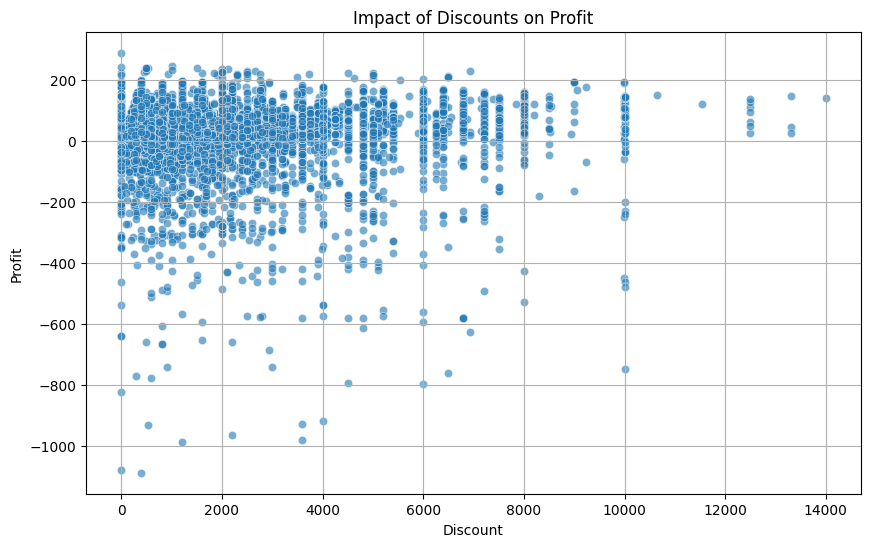

In [32]:

# Scatterplot for Profit vs Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Order Item Discount']*100, y='Benefit per order', alpha=0.6)
plt.title('Impact of Discounts on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


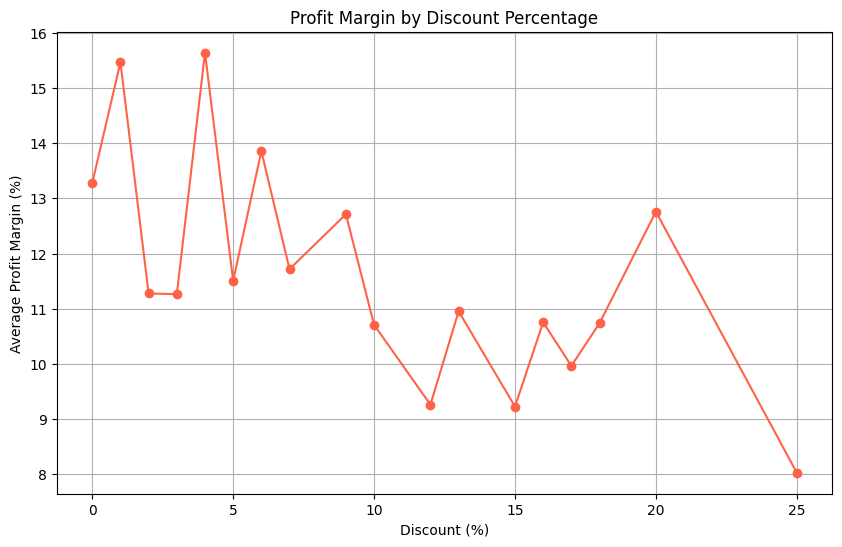

In [38]:
# Add a Profit Margin column
df['Profit Margin'] = (df['Benefit per order'] / df['Sales']) * 100

df['order_item_per'] = df['Order Item Discount Rate']*100
# Average profit margin by discount range
margin_by_discount = df.groupby('order_item_per')['Profit Margin'].mean()

# Visualize profit margin trends
margin_by_discount.plot(kind='line', marker='o', figsize=(10, 6), title='Profit Margin by Discount Percentage', color='tomato')
plt.ylabel('Average Profit Margin (%)')
plt.xlabel('Discount (%)')
plt.grid(True)
plt.show()